In [8]:
import itertools
import random

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import utils

utils.font_setting()

In [9]:
# Hyperparameter
sampling_type = 0
sample_N = 50000
seed = 10
n_obs_list = [2, 3, 4, 5, 6]
Vmax_list = [i+0.5 for i in [1, 2, 3, 4, 5]]
theta_FOV_list = [i*np.pi/180 for i in [5, 10, 30, 60]]
theta_img_list = [np.pi/180*10**i for i in [
    -5.0, -4.0, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0]]
k_list = [2.0**i for i in [0.0, 0.5, 1.0]]
# 'n_obs', 'Vmax', 'theta_FOV', 'theta_img', 'k'

# system
log_dir = './log/subgraph_monte/'

# epsilon
epsilon_list_temp = []
for tuple in list(itertools.product(theta_img_list, k_list)):
    eps = tuple[0] * tuple[1]
    epsilon_list_temp.append(eps)
epsilon_list = list(set(epsilon_list_temp))

# Load
df = pd.read_csv(log_dir + f'summary_{sample_N}_{seed}.csv', index_col=0)


# Correlation Coefficient

In [10]:
def plot(df, target_col, param_col, param_list, figsize=(5*1.6, 5)):
    print(target_col)
    ### Correlation coefficients for all condition ###
    corr = []
    for col in param_col:
        corr.append(df[[target_col, col]].corr().iloc[0,1])
    # 
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Correlation coefficients for all conditions', fontsize=16)
    ax = fig.add_subplot(1, 1, 1)
    # 
    ax.bar(range(len(param_col)), corr, tick_label=param_col)
    ax.set_ylim(-1,1)
    #
    fig.tight_layout()
    plt.show()
    
    ### Scatter ###
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Scatter', fontsize=16)
    for i, col in enumerate(param_col):
        ax = fig.add_subplot(1, len(param_col), i+1)
        ax.scatter(df[col], df[target_col], s=2)
        ax.set_xlabel(col)
    #
    fig.tight_layout()
    plt.show()
    
    ### Correlation coefficients for each condition ###
    corr_dist_list = []
    data_condition_list = []
    for i in range(len(param_col)):
        # 
        if i == len(param_col) - 1:
            condition_param_col = param_col[:i]
            condition_param_list = param_list[:i]
        else:
            condition_param_col = param_col[:i] + param_col[i+1:]
            condition_param_list = param_list[:i] + param_list[i+1:]
        # 
        condition_params_list = list(itertools.product(*condition_param_list))
        # 
        corr_dist = []
        data_condition = []
        for condition_params in condition_params_list:
            c = True
            for j in range(len(condition_param_col)):
                c_temp = (df[condition_param_col[j]] > condition_params[j]-1.0e-8) & (df[condition_param_col[j]] < condition_params[j]+1.0e-8)
                c = c & c_temp
            # 
            df_temp = df[c]
            if df_temp[target_col].std() < 1.0e-16:
                corr_condition = 1.3
            else:
                corr_condition = df_temp[[target_col, param_col[i]]].corr().iloc[0,1]
            corr_dist.append(corr_condition)
            data_condition.append(df_temp[target_col])
        # 
        corr_dist_list.append(corr_dist)
        data_condition_list.append(data_condition)
    # 
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Correlation coefficients for each condition', fontsize=16)
    for i, col in enumerate(param_col):
        ax = fig.add_subplot(1, len(param_col), i+1)
        ax.hist(corr_dist_list[i], bins=20)
        ax.set_xlim(-1, 1.3)
        ax.set_xlabel(col)
        ax.axvline(x=1.1, color='black')
    #
    fig.tight_layout()
    plt.show()
    
    # ### Scatter for each condition ###
    # fig = plt.figure(figsize=figsize)
    # fig.suptitle('Scatter for each condition', fontsize=16)
    # for i, col in enumerate(param_col):
    #     ax = fig.add_subplot(1, len(param_col), i+1)
    #     for df_target_col in data_condition_list[i]:
    #         ax.plot(param_list[i], df_target_col, lw=0.1)
    #     ax.set_xlabel(col)
    # #
    # fig.tight_layout()
    # plt.show()
    

---

time_mean


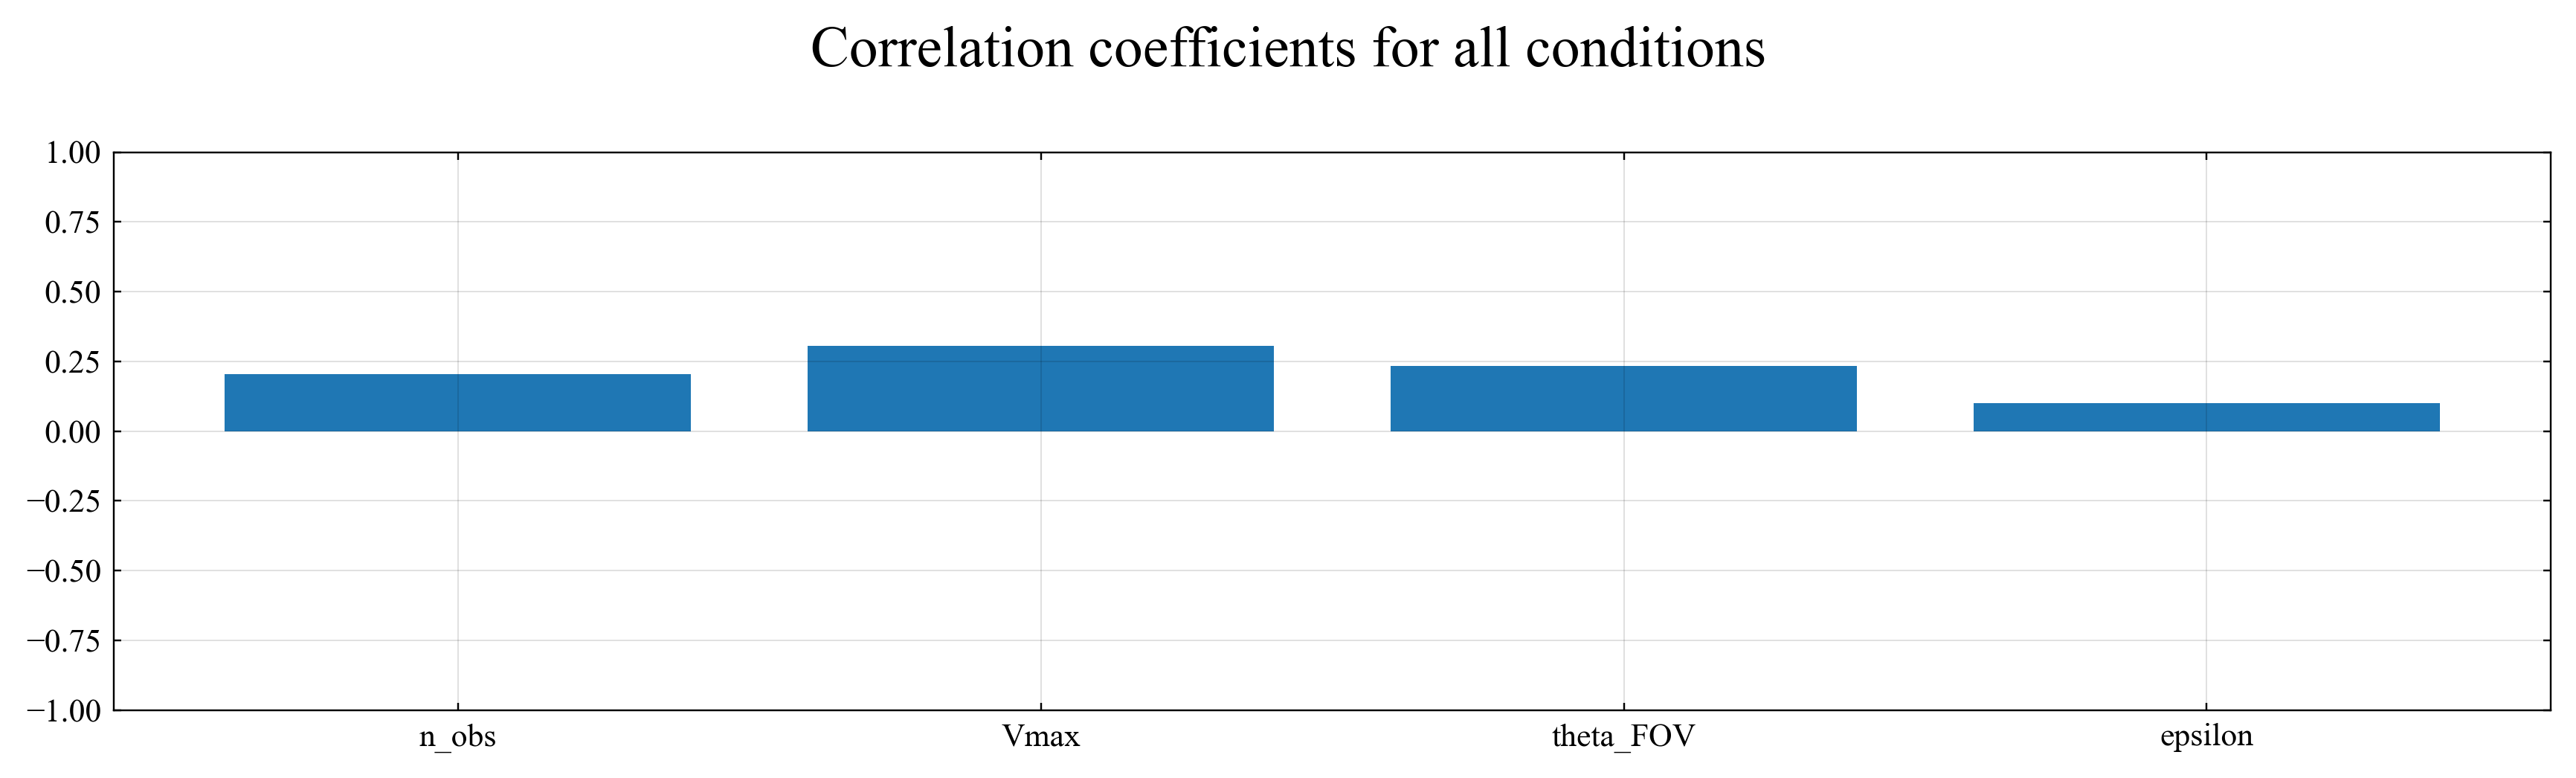

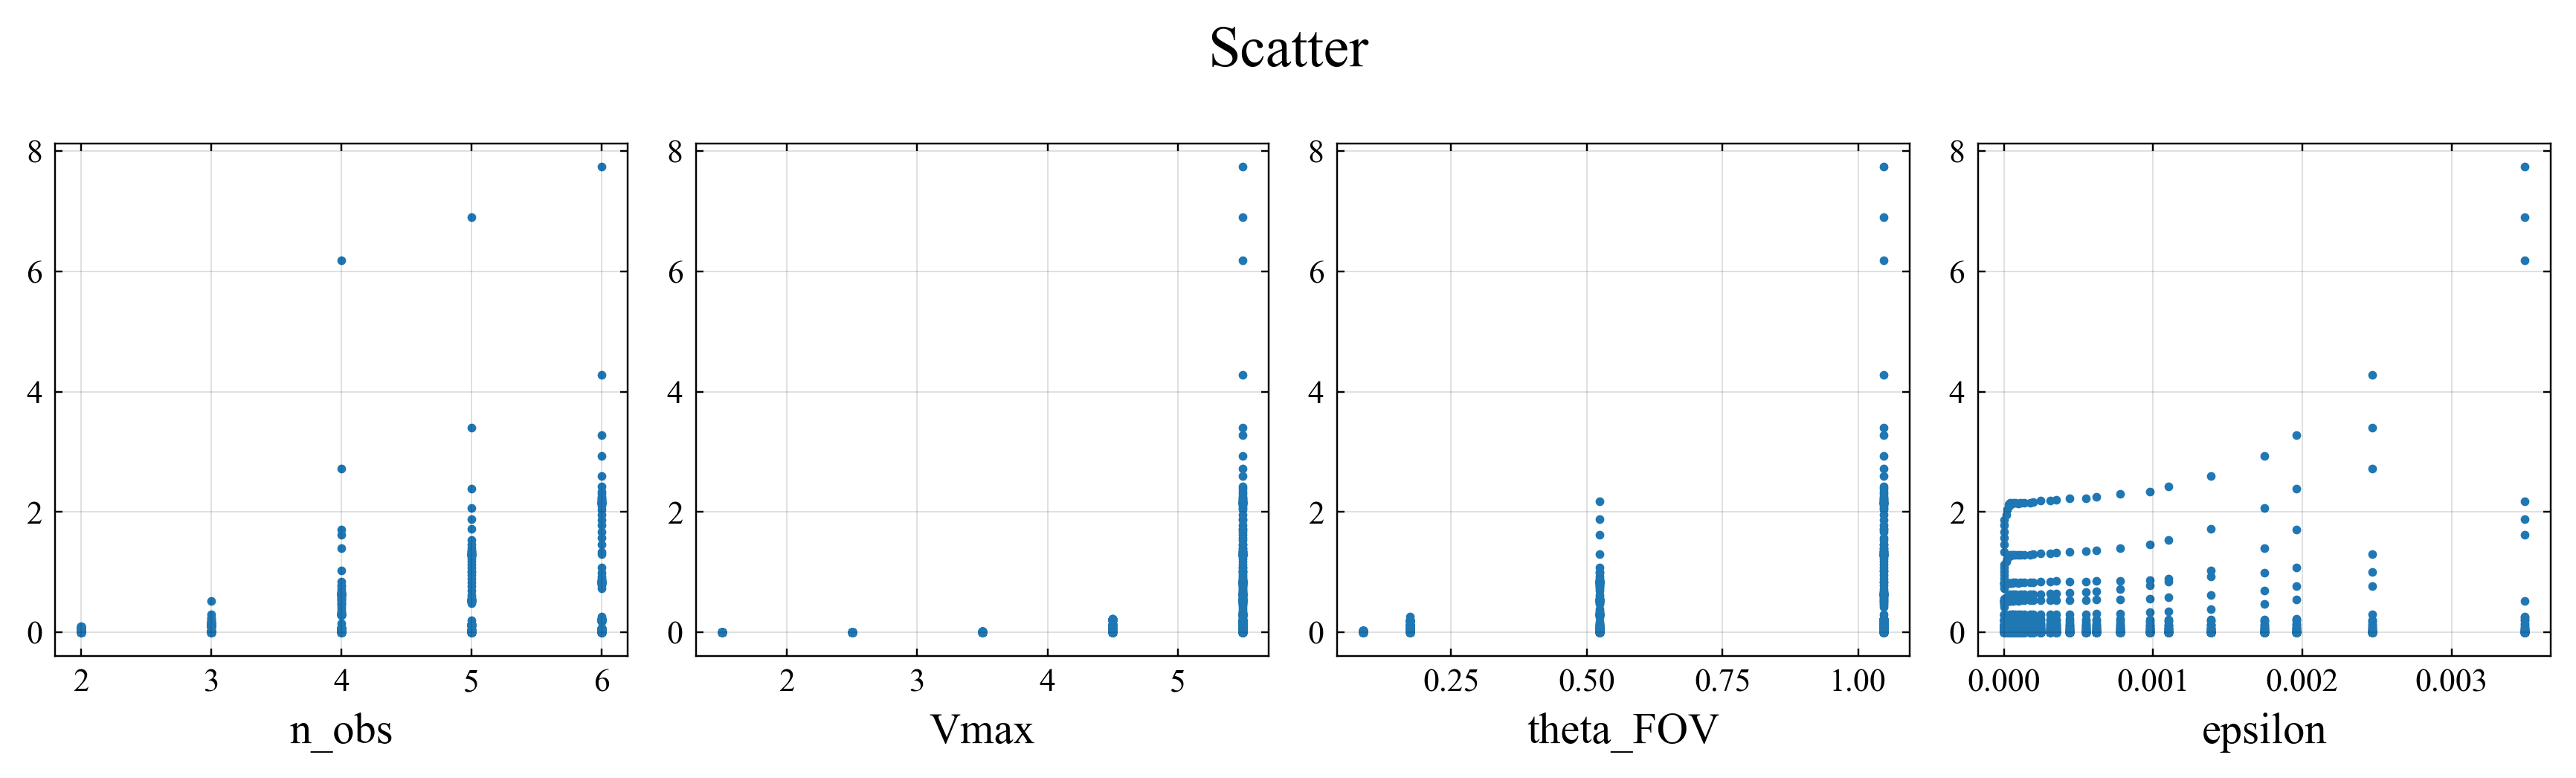

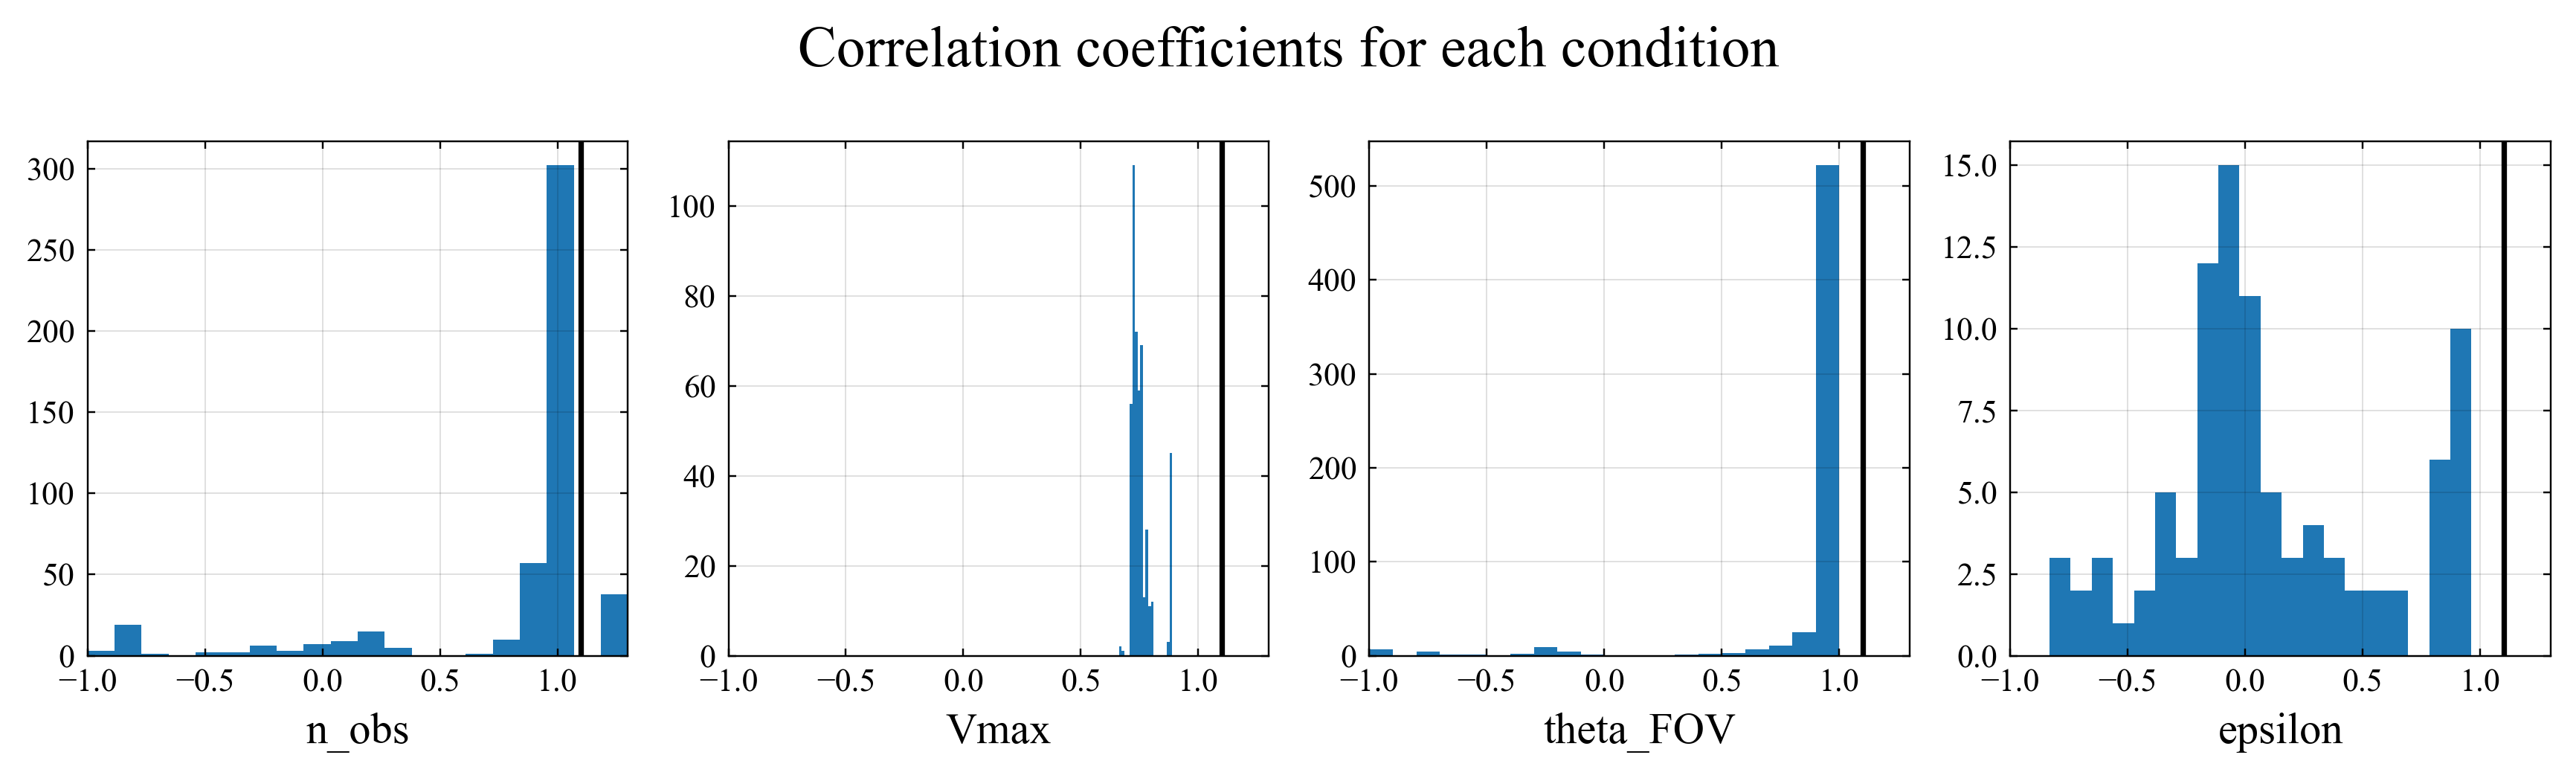

In [11]:
figsize = (10, 3)
target_col = 'time_mean'
param_col = ['n_obs', 'Vmax', 'theta_FOV', 'epsilon']
param_list = [n_obs_list, Vmax_list, theta_FOV_list, epsilon_list]

plot(df, target_col, param_col, param_list, figsize=figsize)

- n_obsが増加すれば計算時間は増大する傾向にある。（処理が増えるから）
- Vmaxが増加すれば（星の数が増えれば）計算時間は増大する傾向にある。（候補が増え、その分ループ数が増える）
- theta_FOVが増加すれば計算時間は増大する傾向にある。（90deg.に近いほど、候補が増え、その分ループ数が増える）
- 基本的にepsilonが増加すれば計算時間は増大する傾向にある。しかし、条件によっては影響しない場合もある。（？）


matching_num_mean


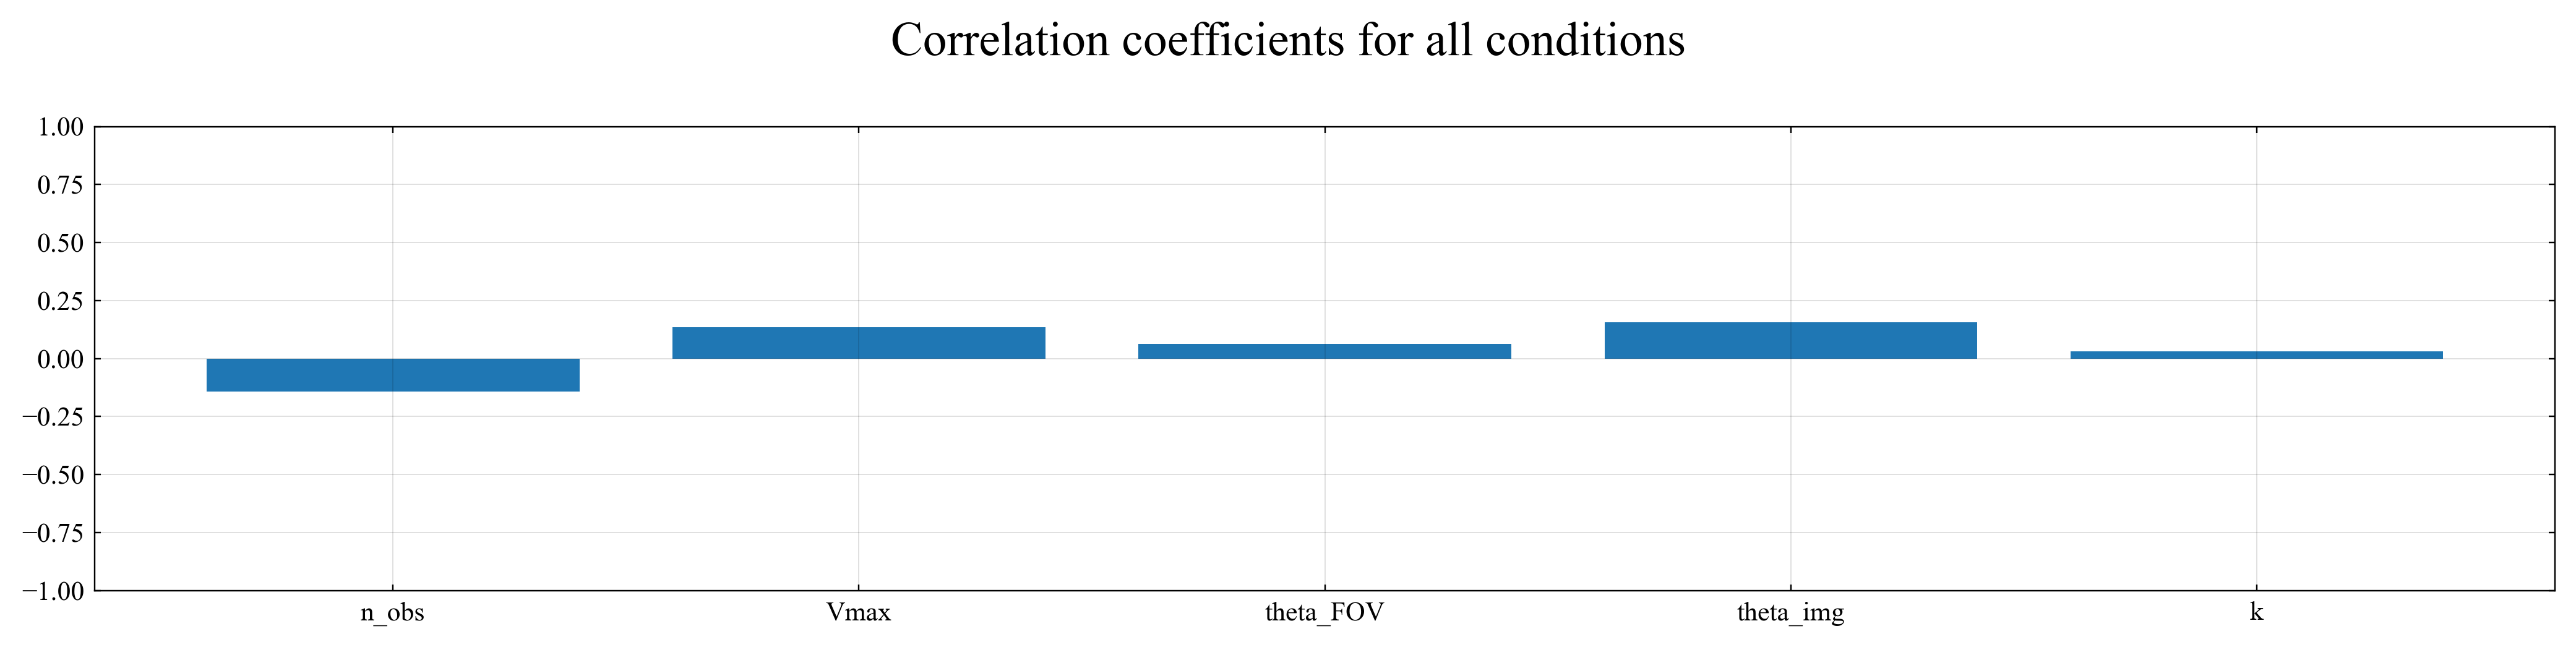

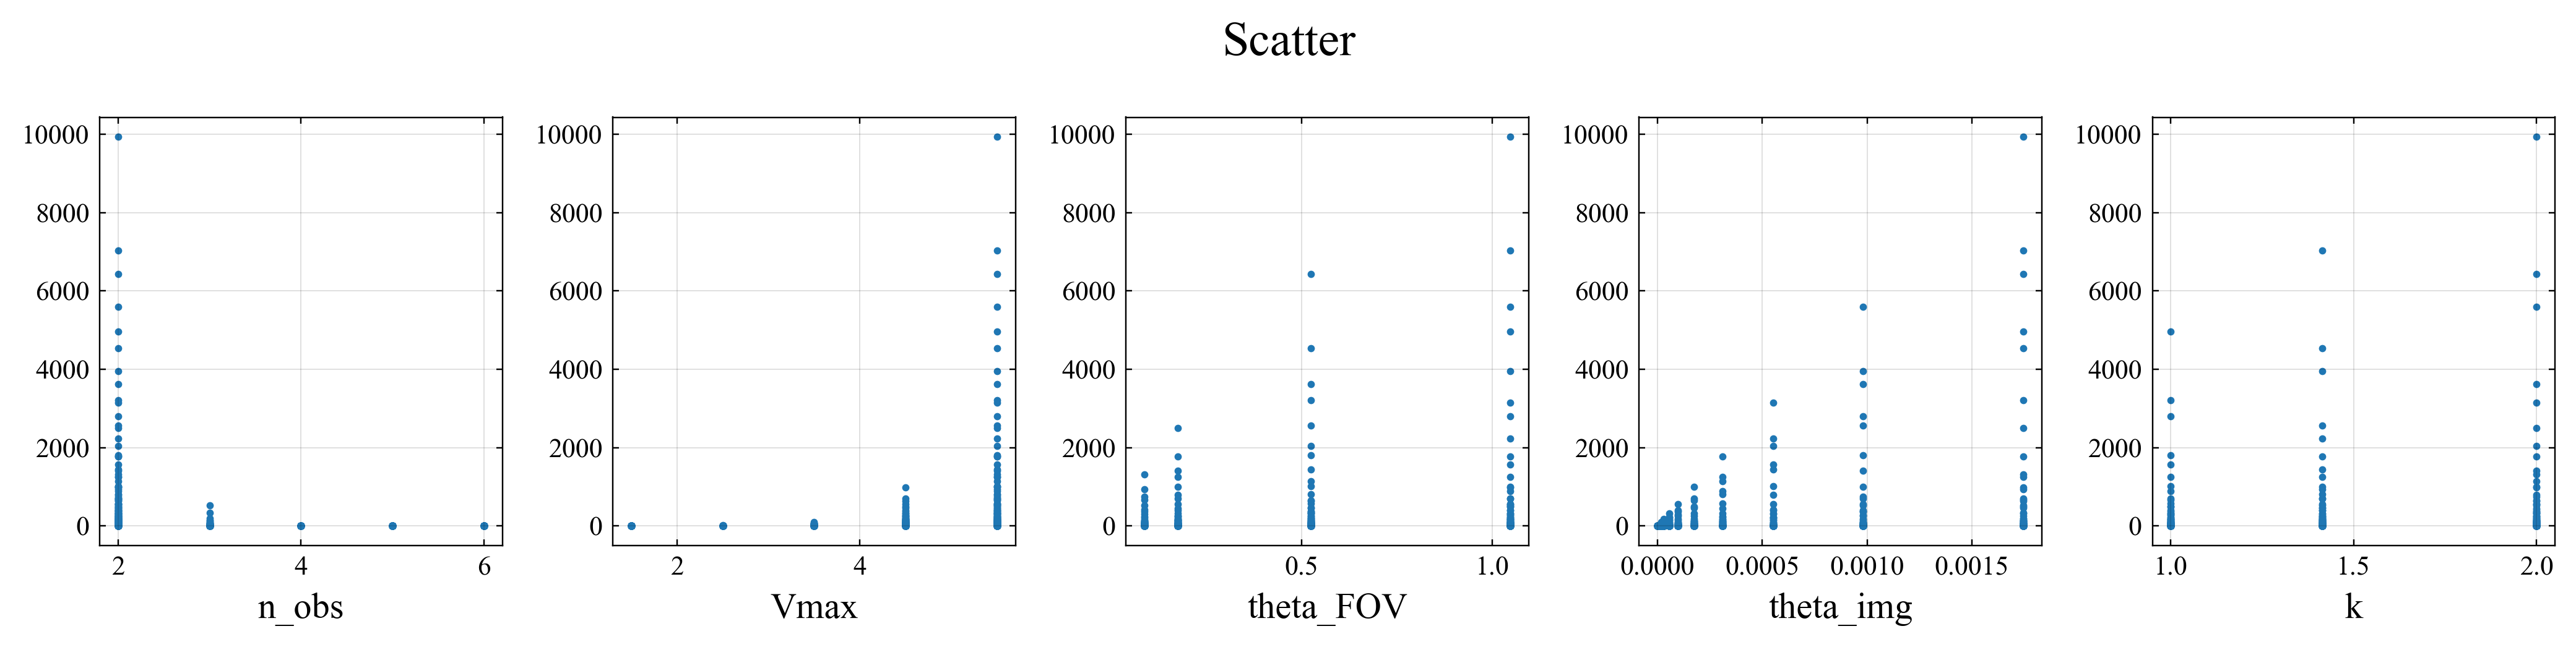

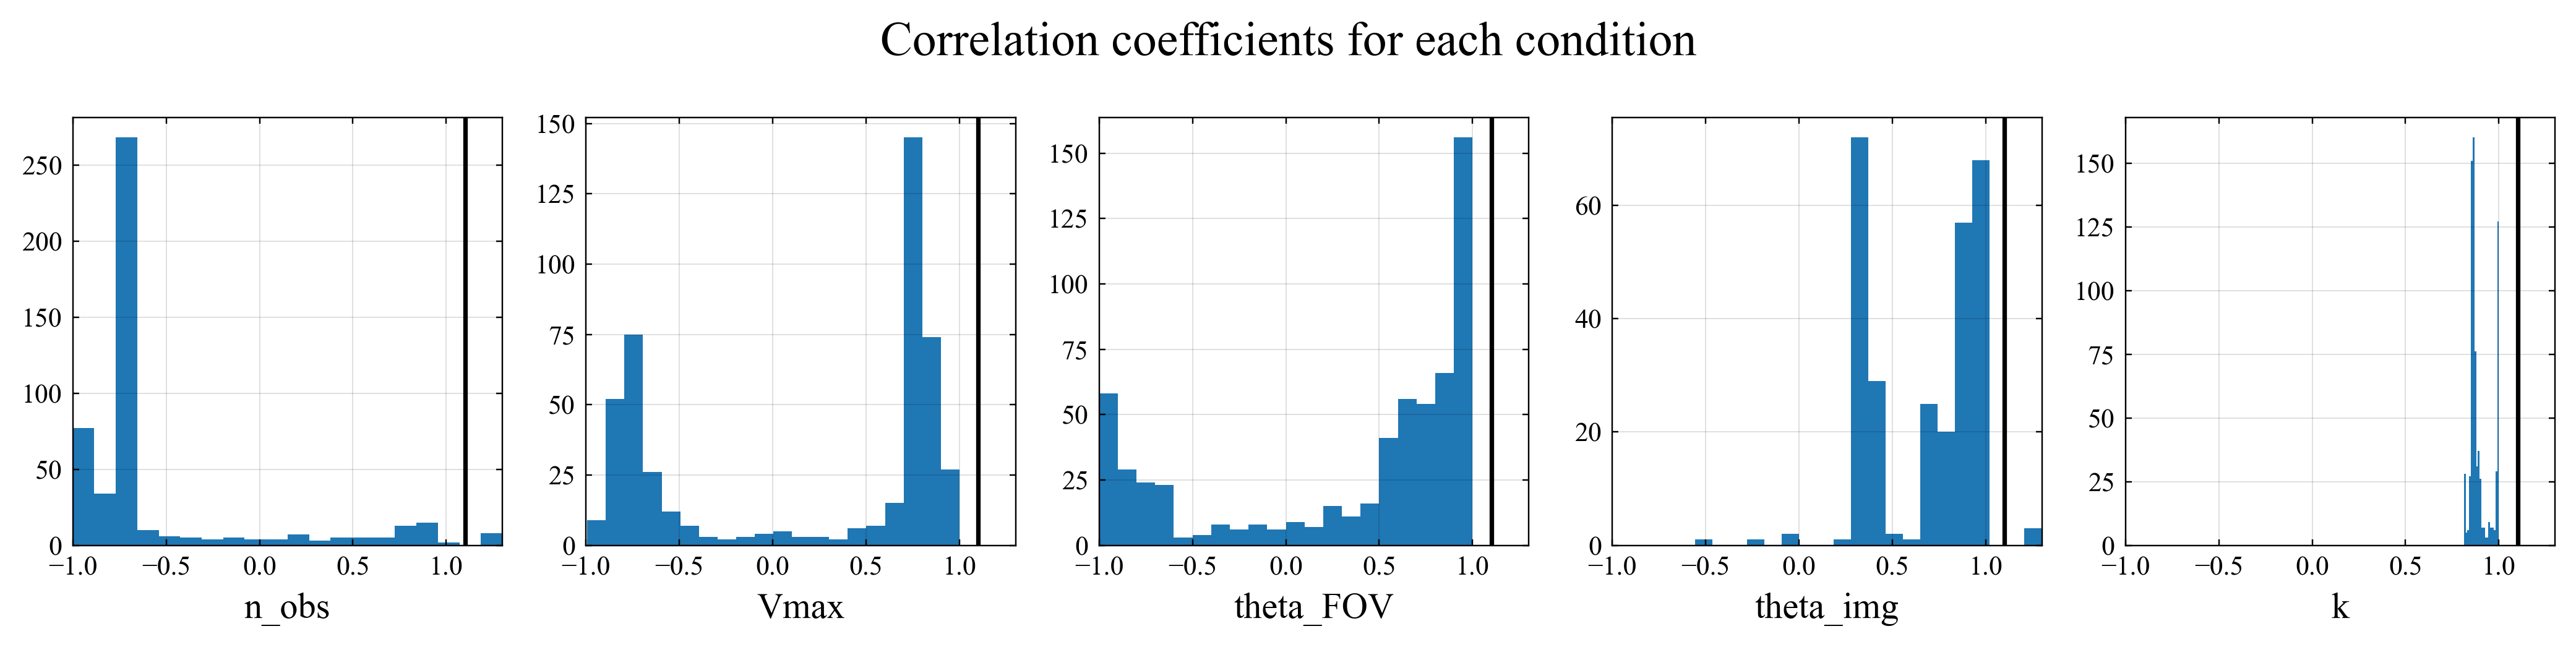

In [12]:
figsize = (12, 3)
target_col = 'matching_num_mean'
param_col = ['n_obs', 'Vmax', 'theta_FOV', 'theta_img', 'k']
param_list = [n_obs_list, Vmax_list, theta_FOV_list, theta_img_list, k_list]

plot(df, target_col, param_col, param_list, figsize=figsize)

- n_obsが増加すれば一致する集合の数は減少する。（偶然重なる確率が減るから）
- Vmaxと一致する集合の数には相関があるが、条件によって正と負が入れ替わる。（？、）
- theta_FOVが増加すれば一致する集合の数は増加する。（）
- theta_imgとk、つまりepsilonが増加すれば一致する集合の数は増加する。（）


included_unique_num


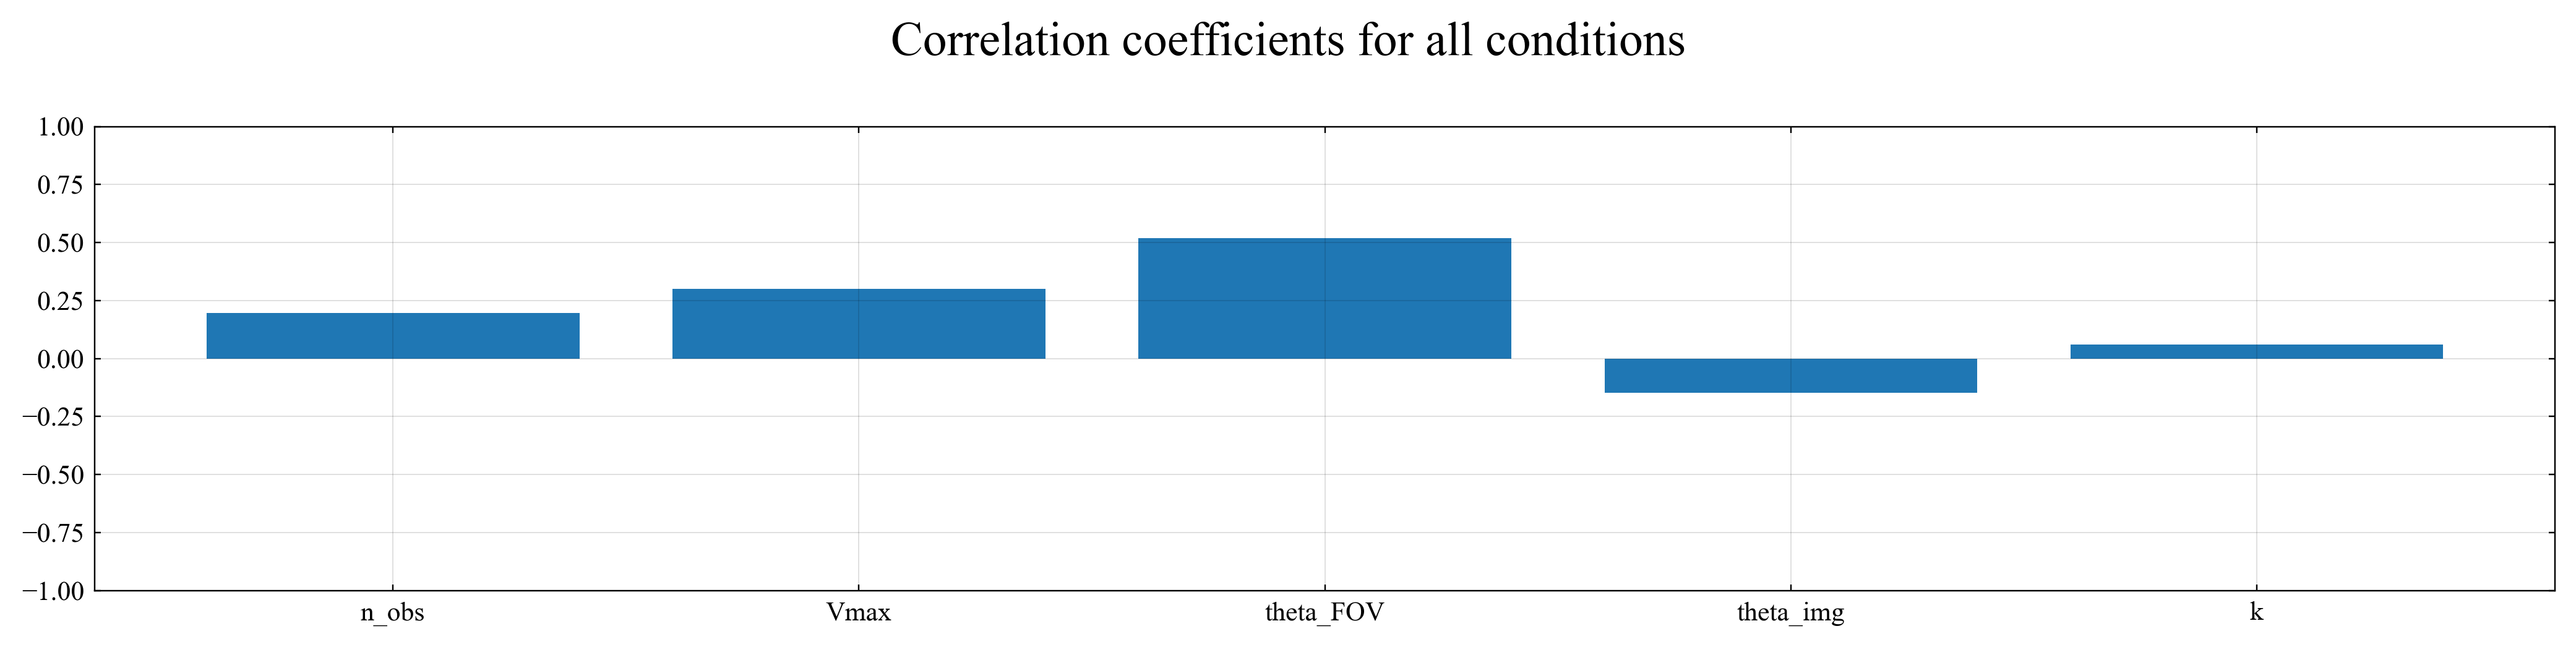

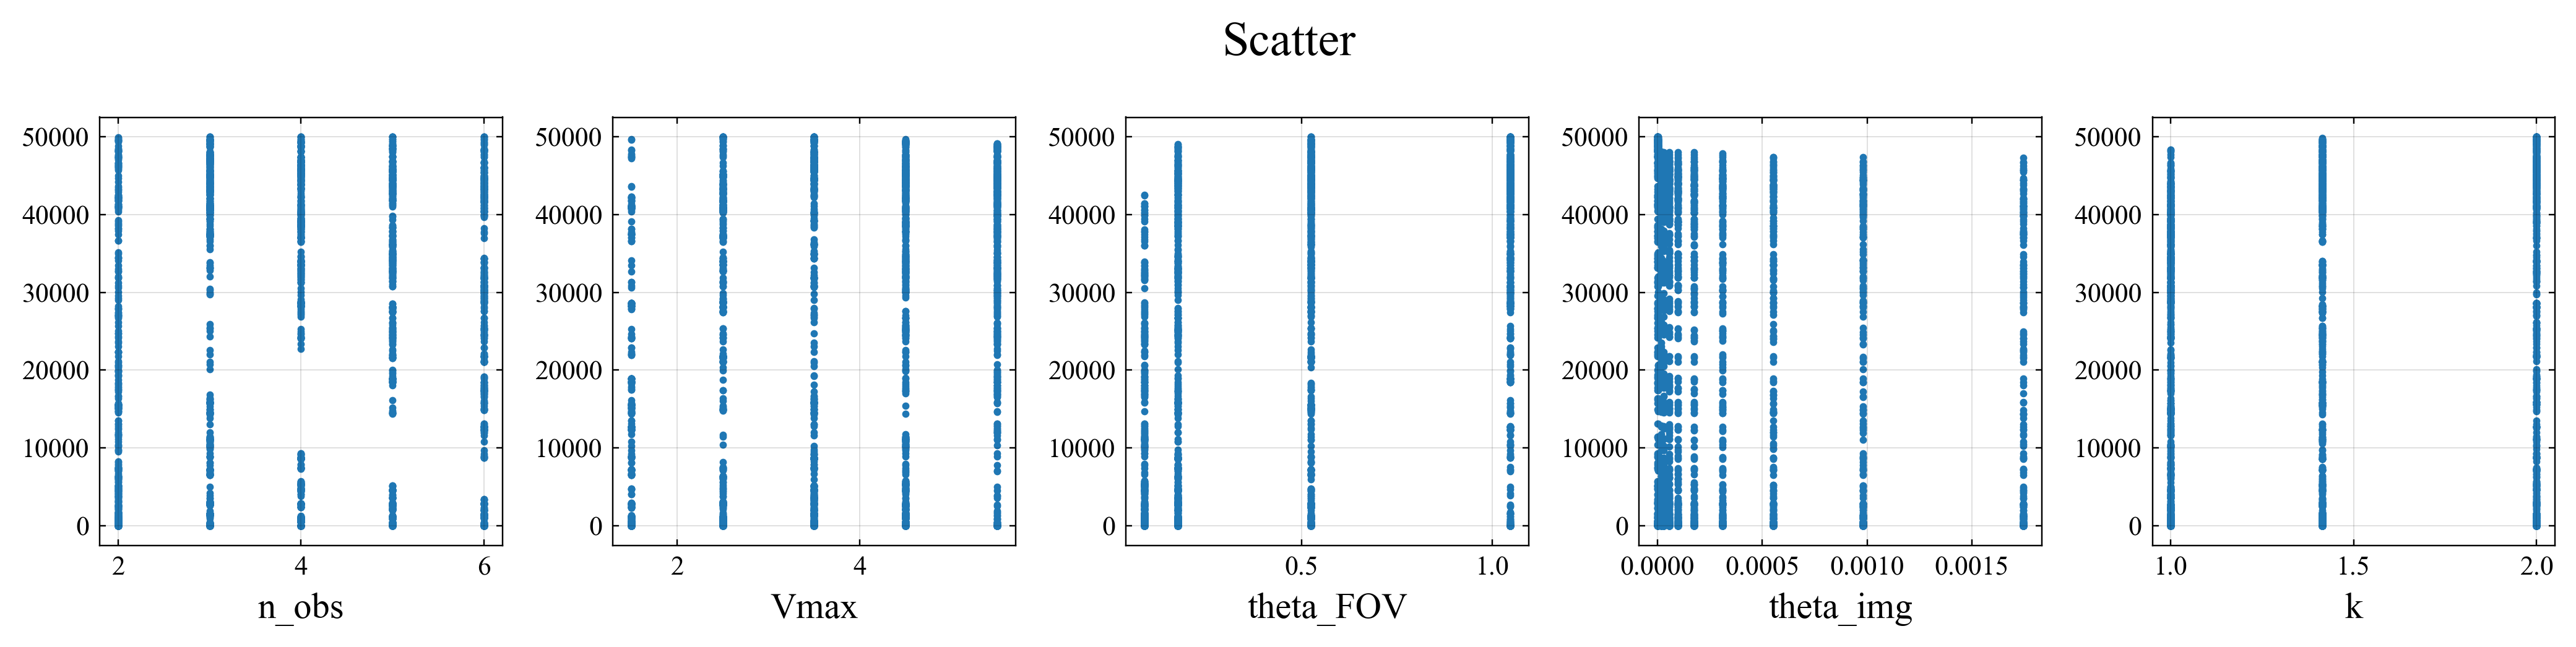

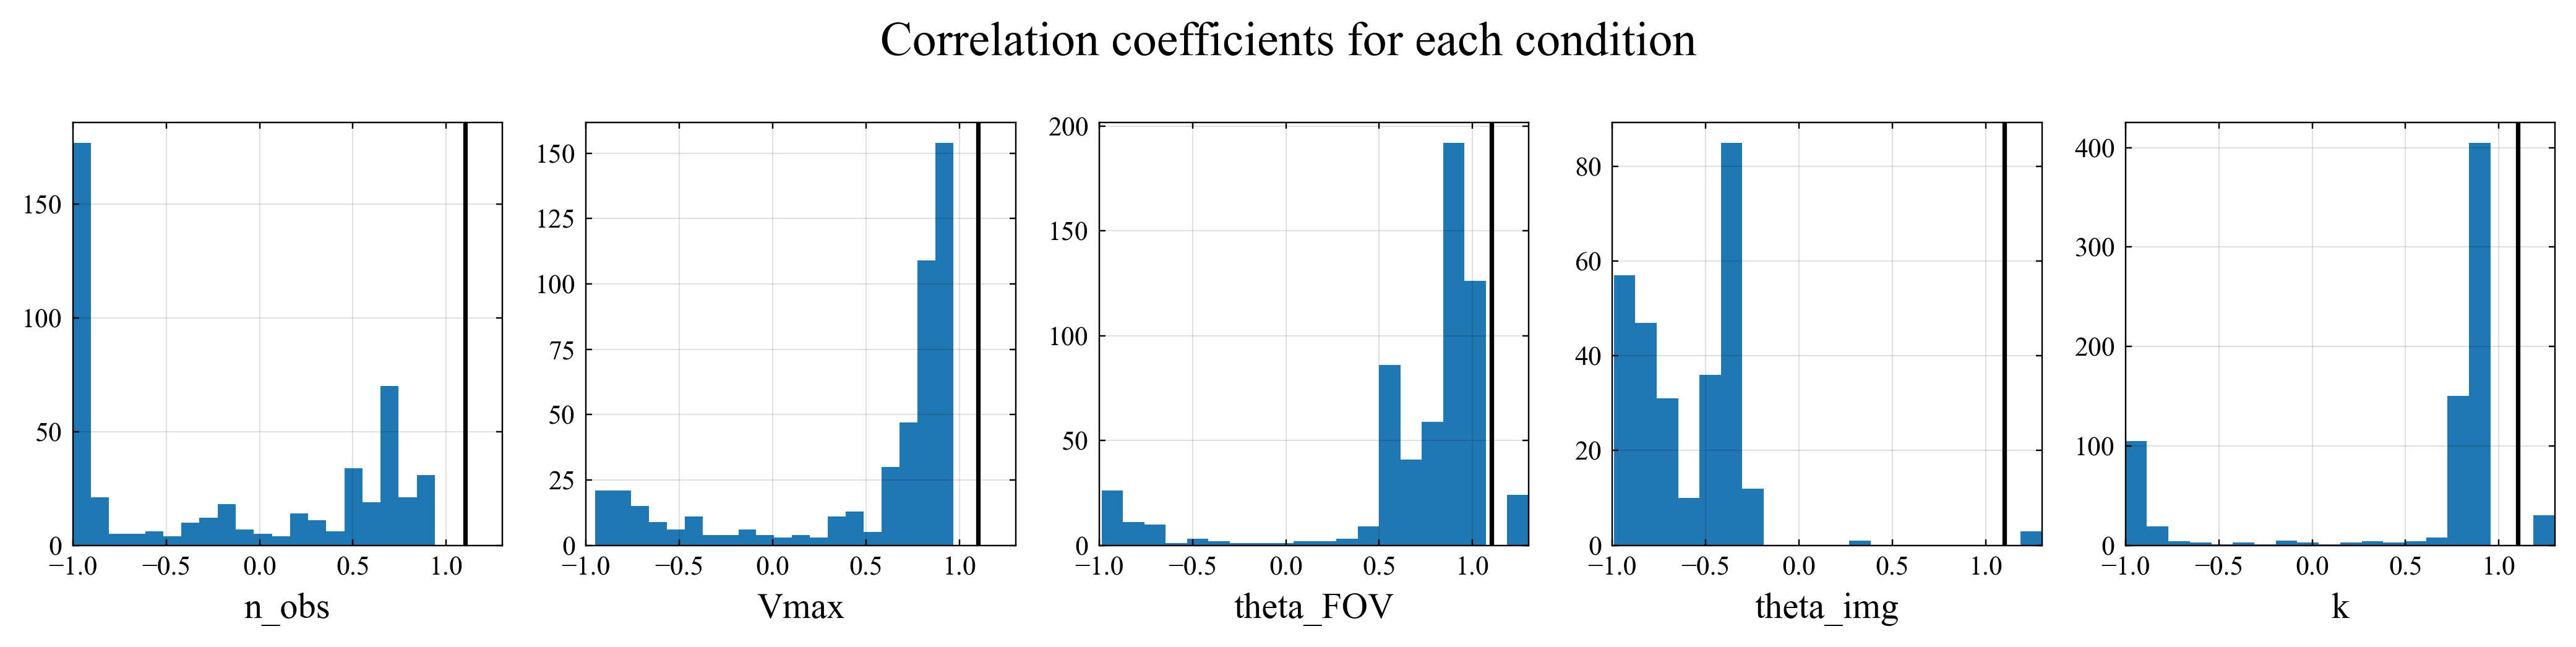

In [13]:
figsize = (12, 3)
target_col = 'included_unique_num'
param_col = ['n_obs', 'Vmax', 'theta_FOV', 'theta_img', 'k']
param_list = [n_obs_list, Vmax_list, theta_FOV_list, theta_img_list, k_list]

plot(df, target_col, param_col, param_list, figsize=figsize)

- n_obsが増加することで一意性が高まり結果正解率が向上する正の相関を持つ場合と、n_obsが増加することで正解が含まれない誤差が発生する確率が向上することで負の相関を持つ場合がある。
- Vmaxが増加すると正解率が高くなるのはなぜ？？？？。
- theta_FOVが増加すると正解率が高くなるのはなぜ？？？？。
- theta_imgが小さいと正解率が高くなる（おそらく一意性が高くなるから）。
- kが大きいと正解率が高くなる（一意性は下がっても正解が含まれる確率が高くなるから）。


notincluded_unique_num


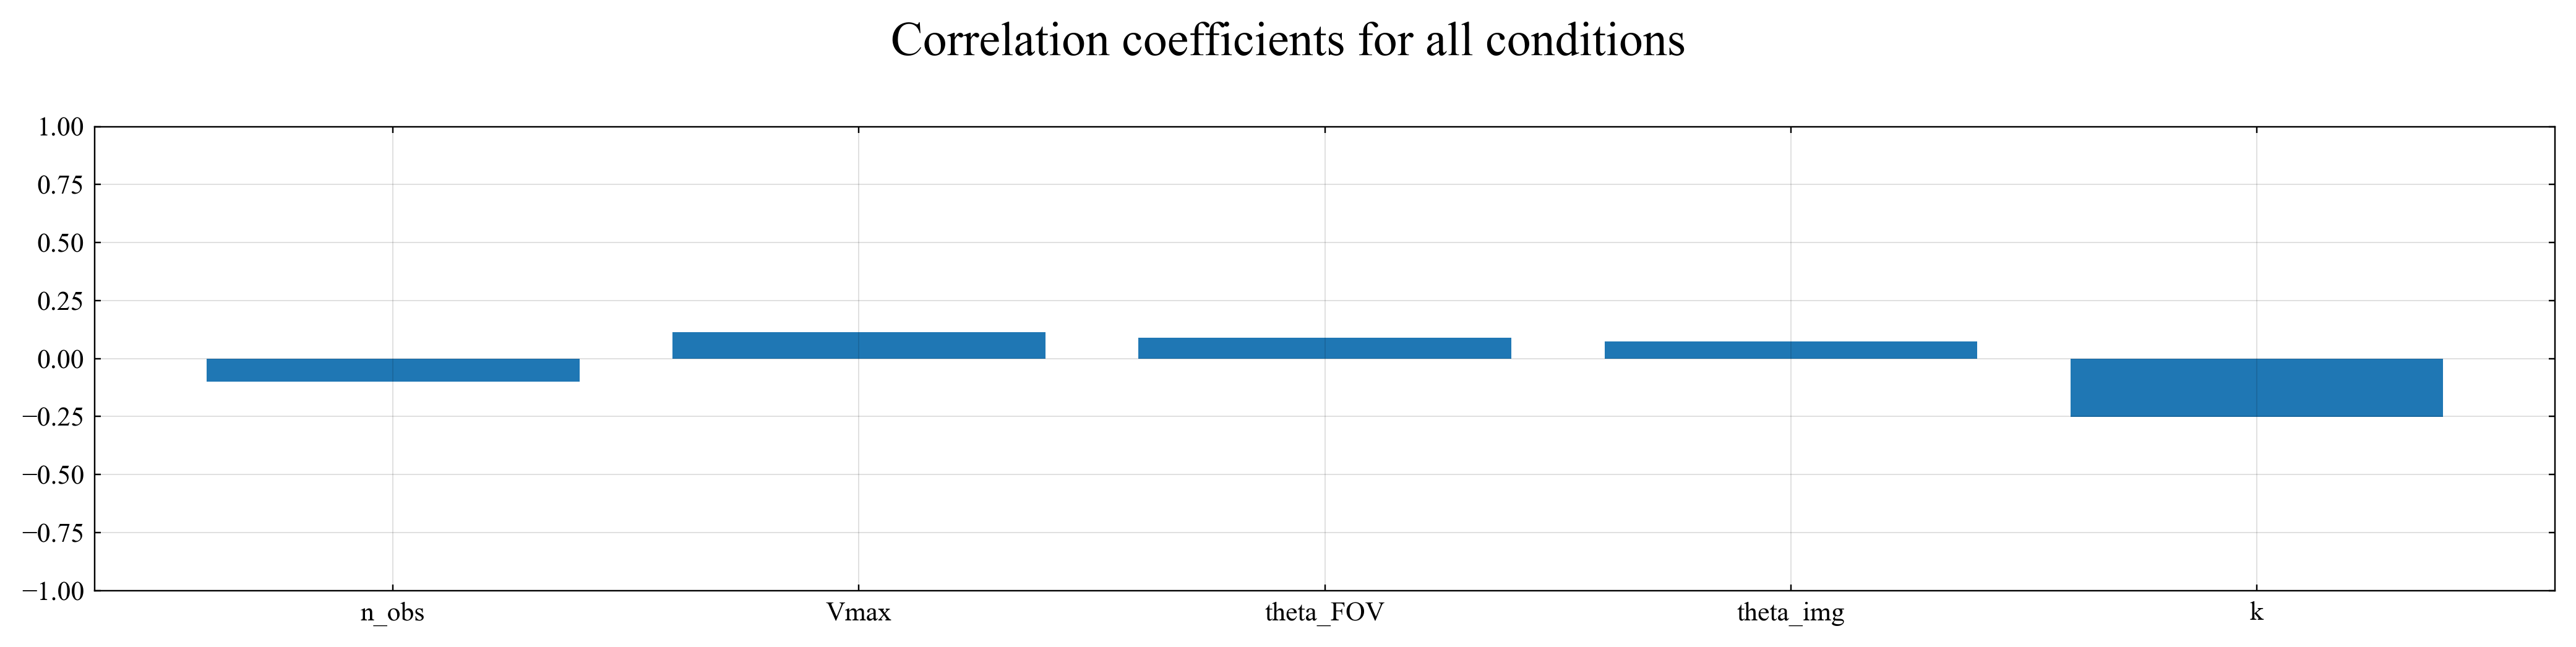

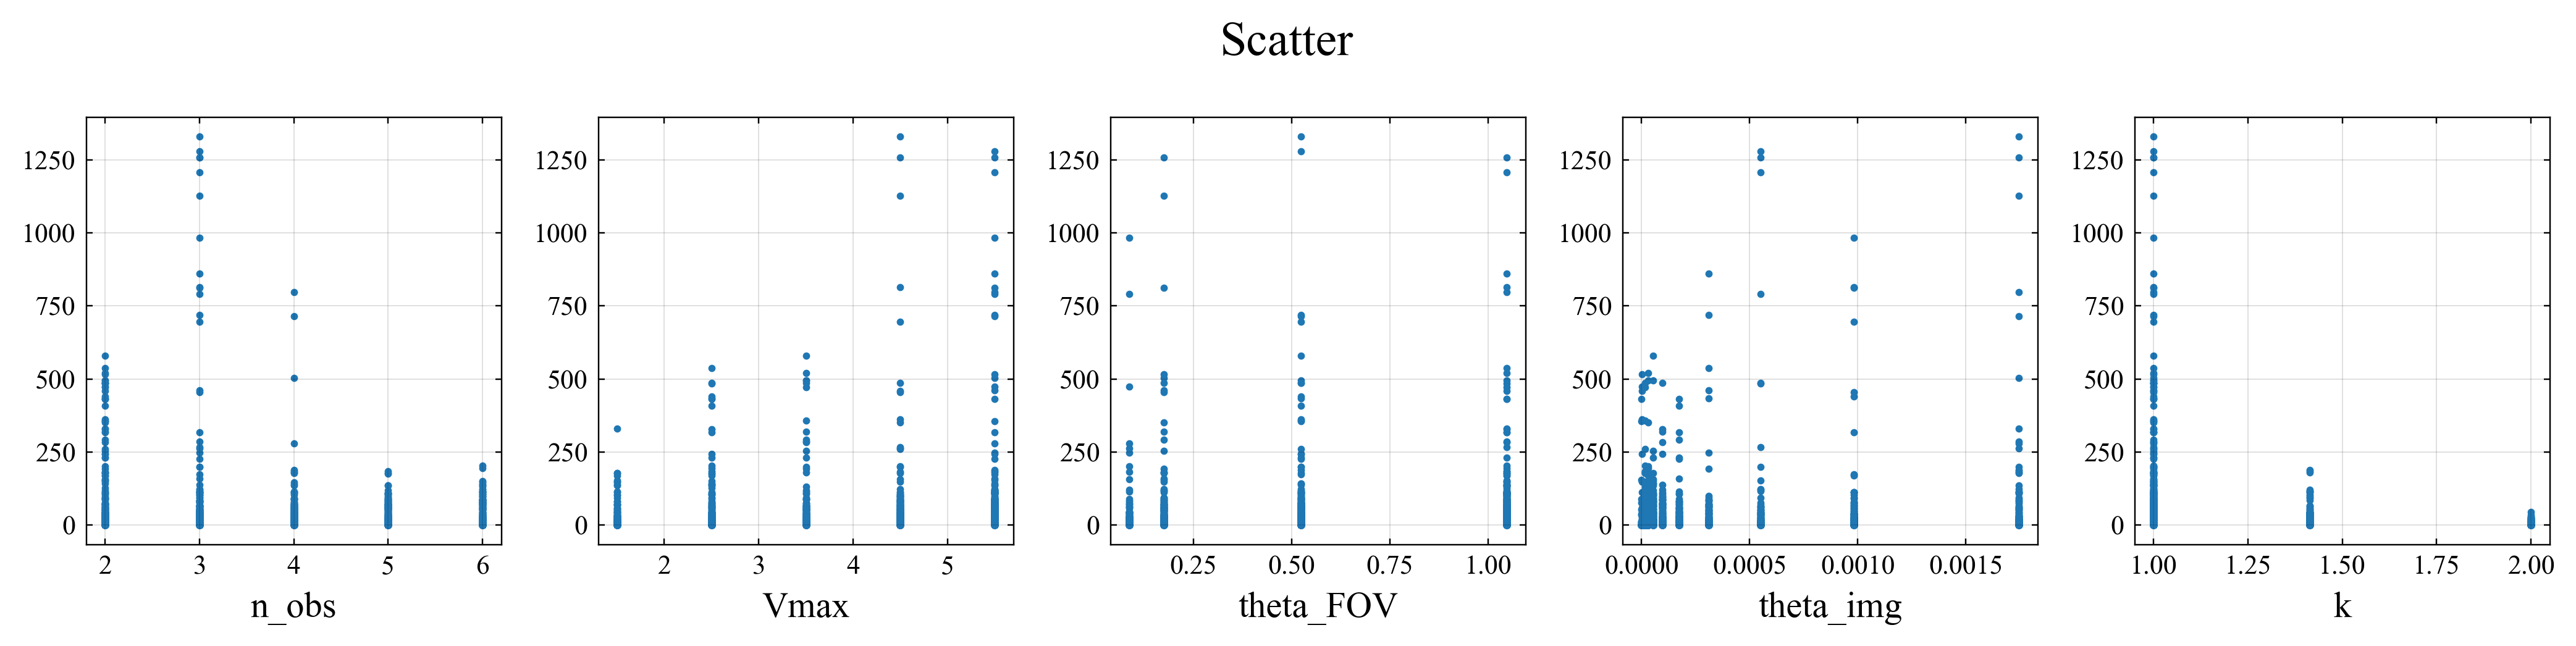

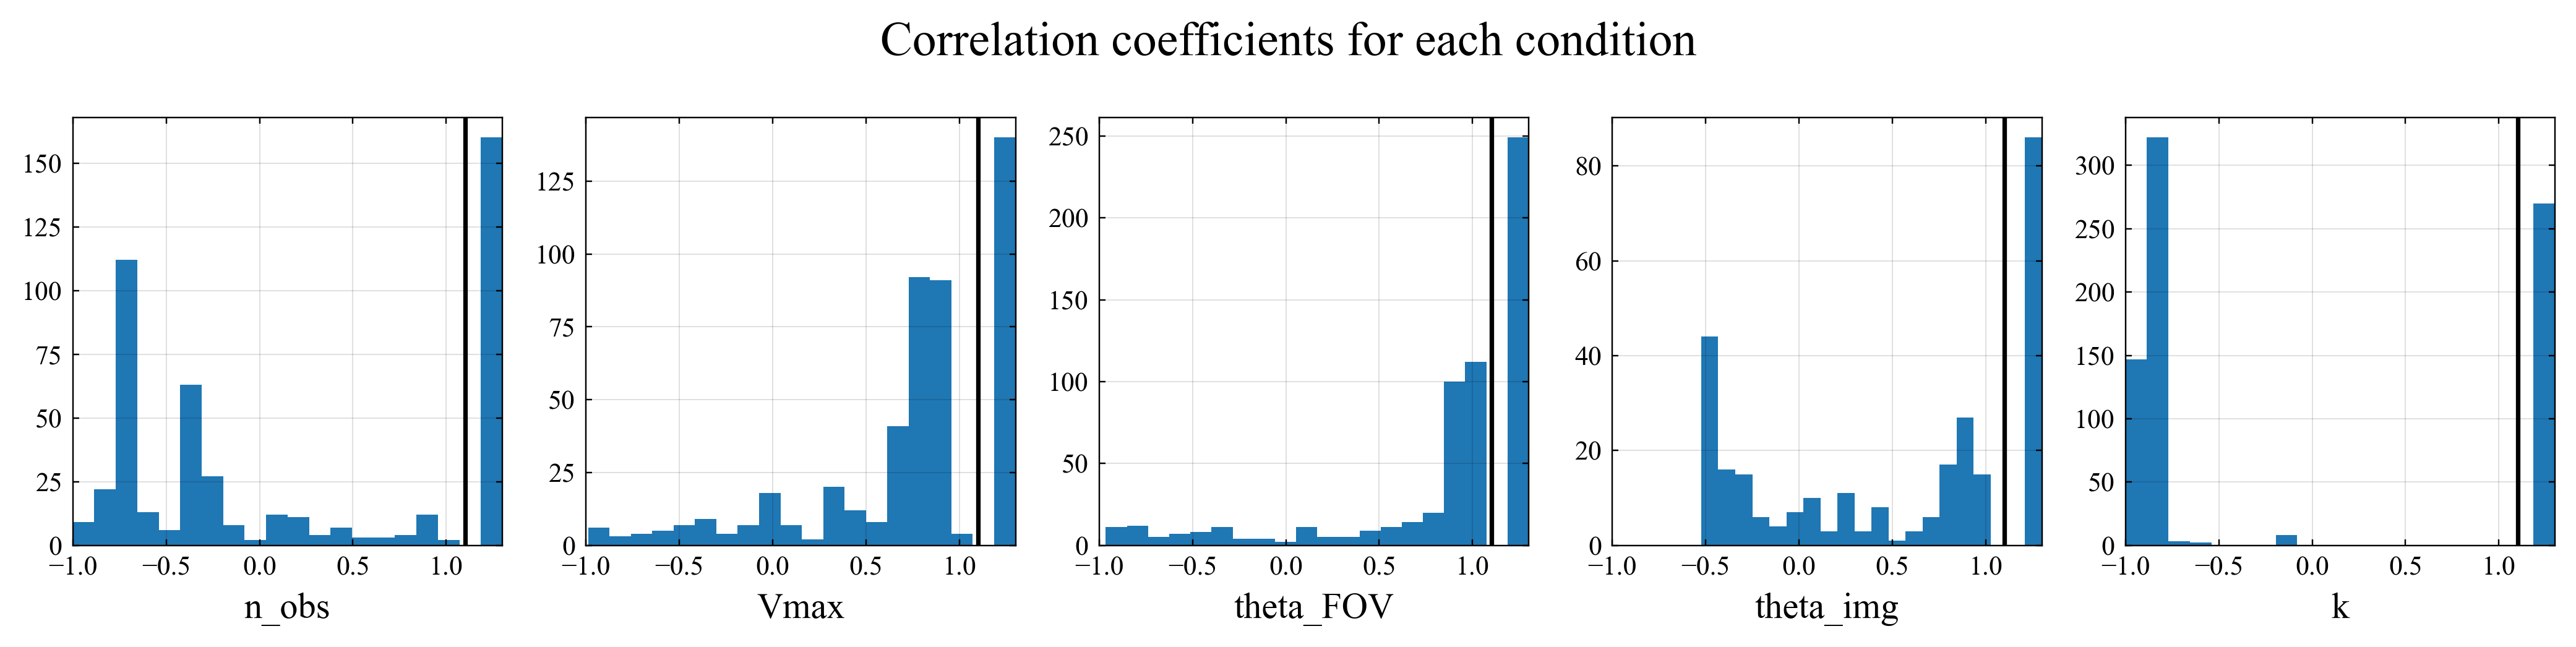

In [14]:
figsize = (12, 3)
target_col = 'notincluded_unique_num'
param_col = ['n_obs', 'Vmax', 'theta_FOV', 'theta_img', 'k']
param_list = [n_obs_list, Vmax_list, theta_FOV_list, theta_img_list, k_list]

plot(df, target_col, param_col, param_list, figsize=figsize)

- n_obsを増加させることにより不正解率は減少する。（一つ当たりの選ばれる確率（面積）が減少するため、たまたまが減少する）
- Vmaxが増加すると不正解率が増加する。（密度が増加すると誤差を含めたものに偶然一致する確率が上がる）
- theta_FOVが増加すると不正解率が増加する。（90deg.に近いところが増えるから？）
- theta_imgが小さいと正解率が高くなる。（おそらく一意性が高くなるから）
- kが大きいと不正解率が小さくなる。（正解が含まれる確率が高くなるから）

※missは少ないので相関係数がNanになる割合が多い

ambiguous_num


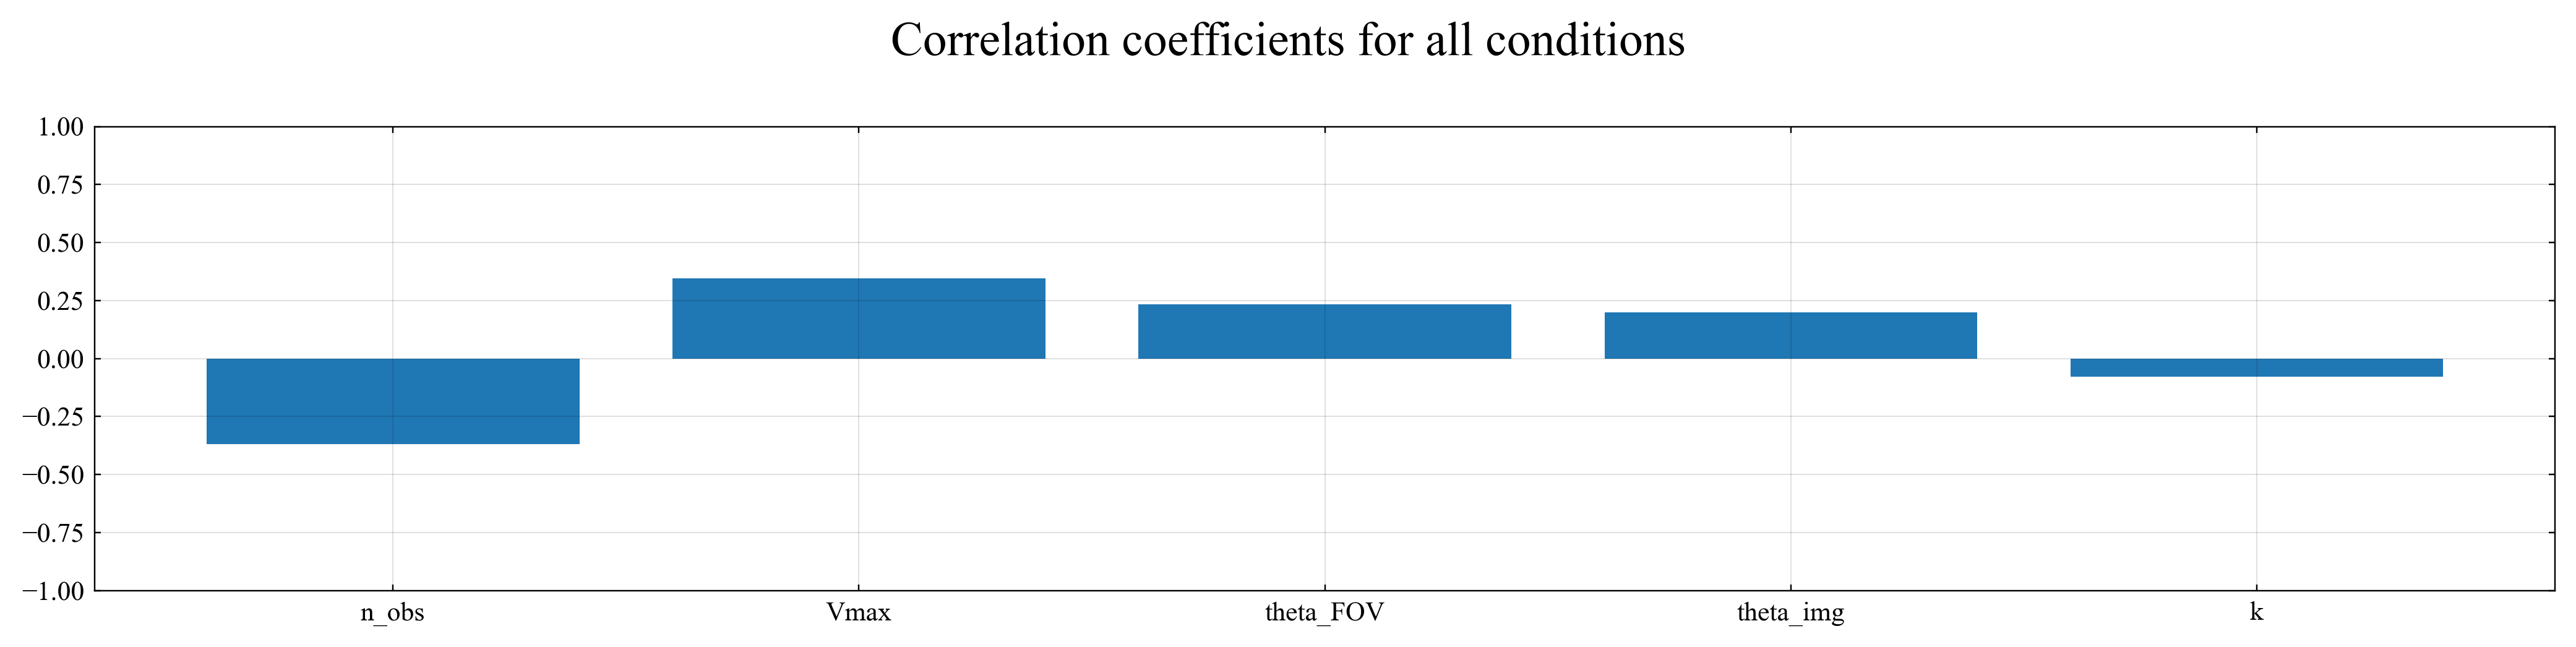

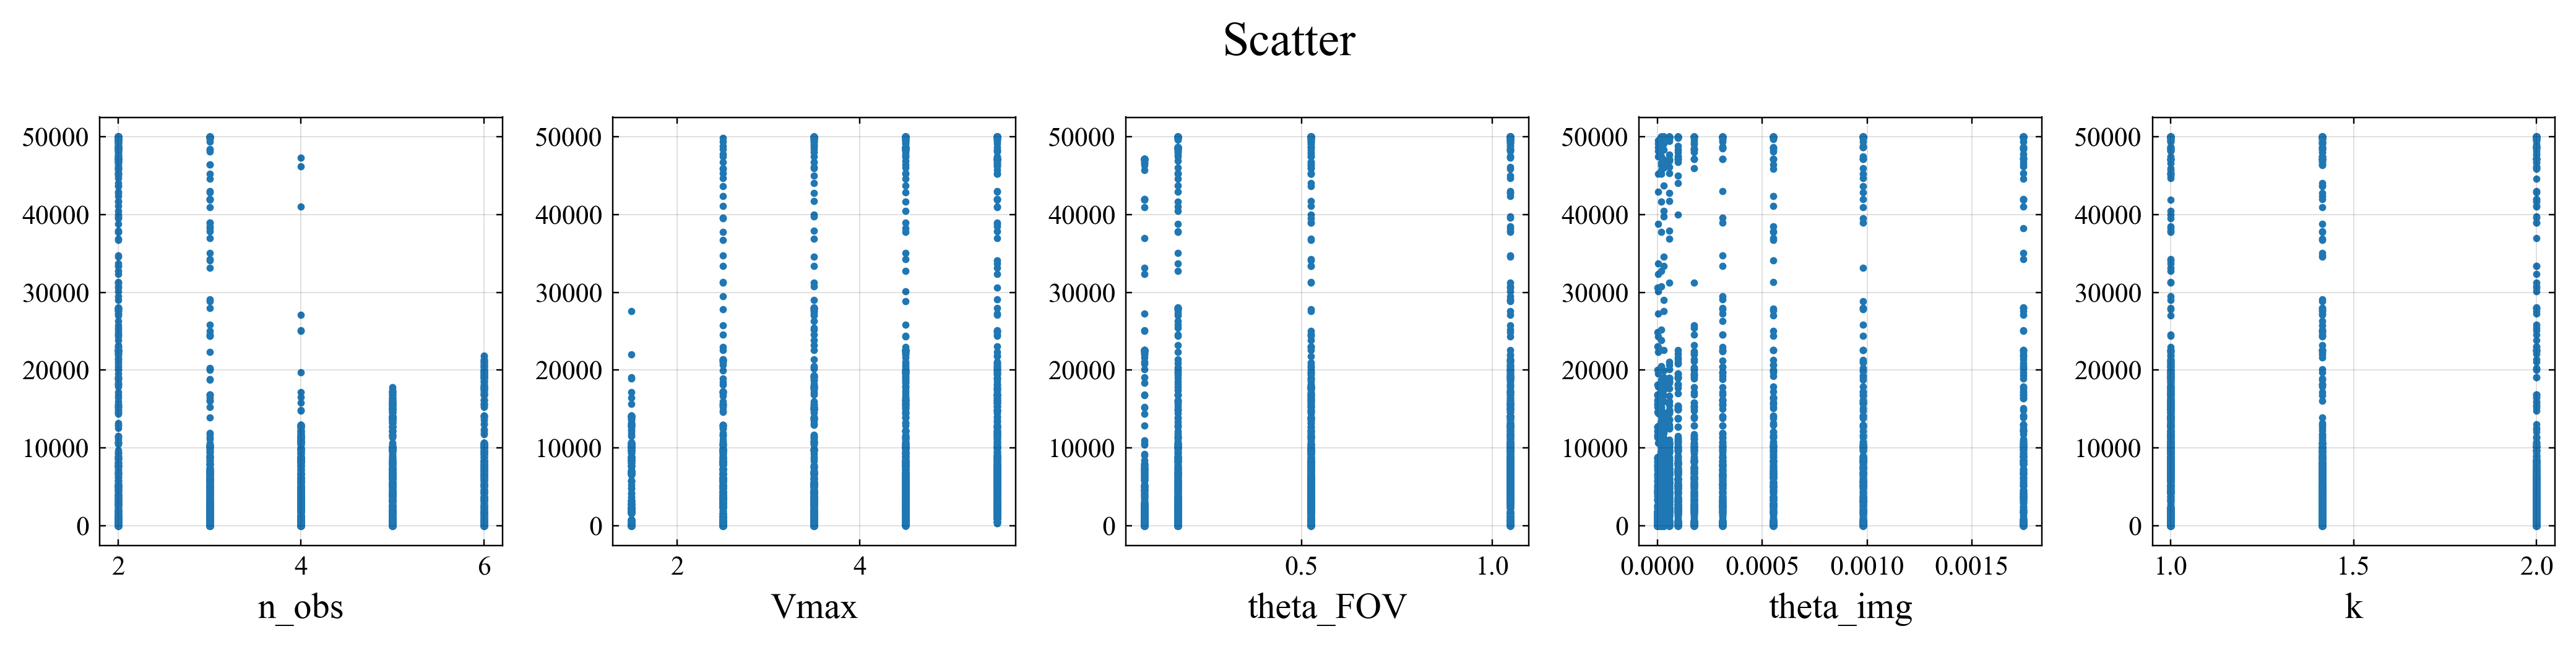

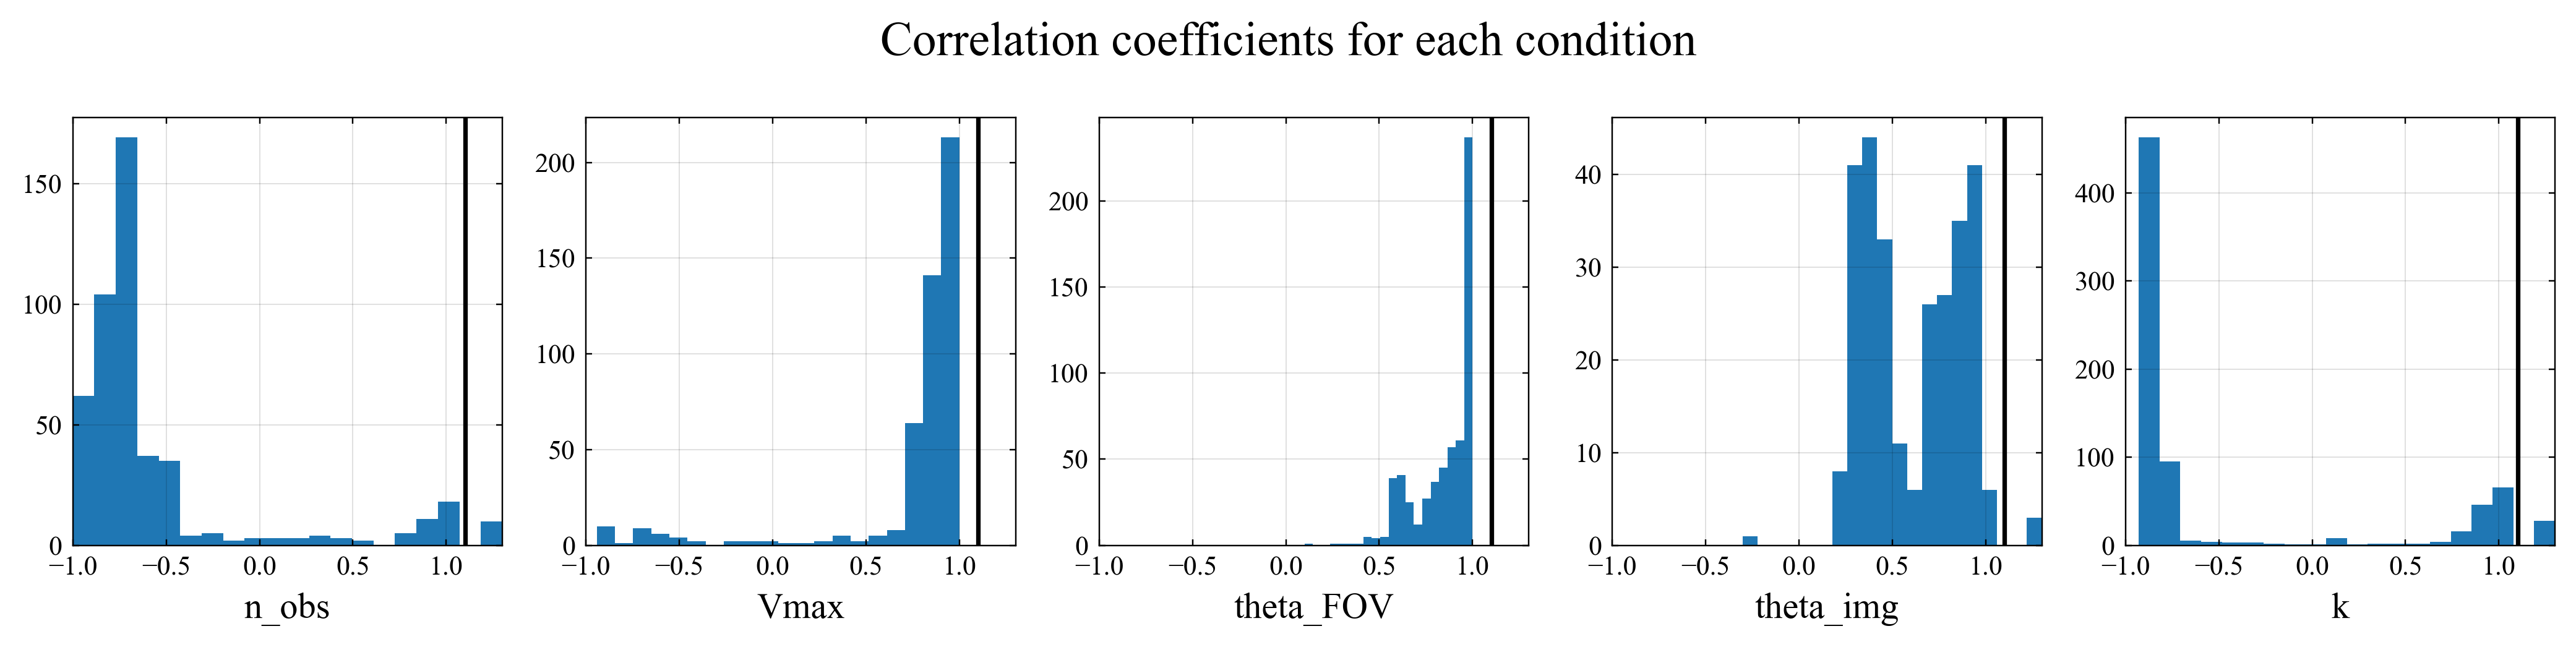

In [15]:
figsize = (12, 3)
target_col = 'ambiguous_num'
param_col = ['n_obs', 'Vmax', 'theta_FOV', 'theta_img', 'k']
param_list = [n_obs_list, Vmax_list, theta_FOV_list, theta_img_list, k_list]

plot(df, target_col, param_col, param_list, figsize=figsize)

- n_obsを増加させることにより一意性が向上している。（）
- Vmaxが増加すると一意性が低下している。（偶然重なる確率が増える）
- theta_FOVが増加すると一意性が低下している。（90deg.に近いところが増えて、偶然重なる確率が増える）
- theta_imgが大きいと一意性が下がっている。（）
- kが大きいと一意性が上がる。（？）

notincluded_noexist_num


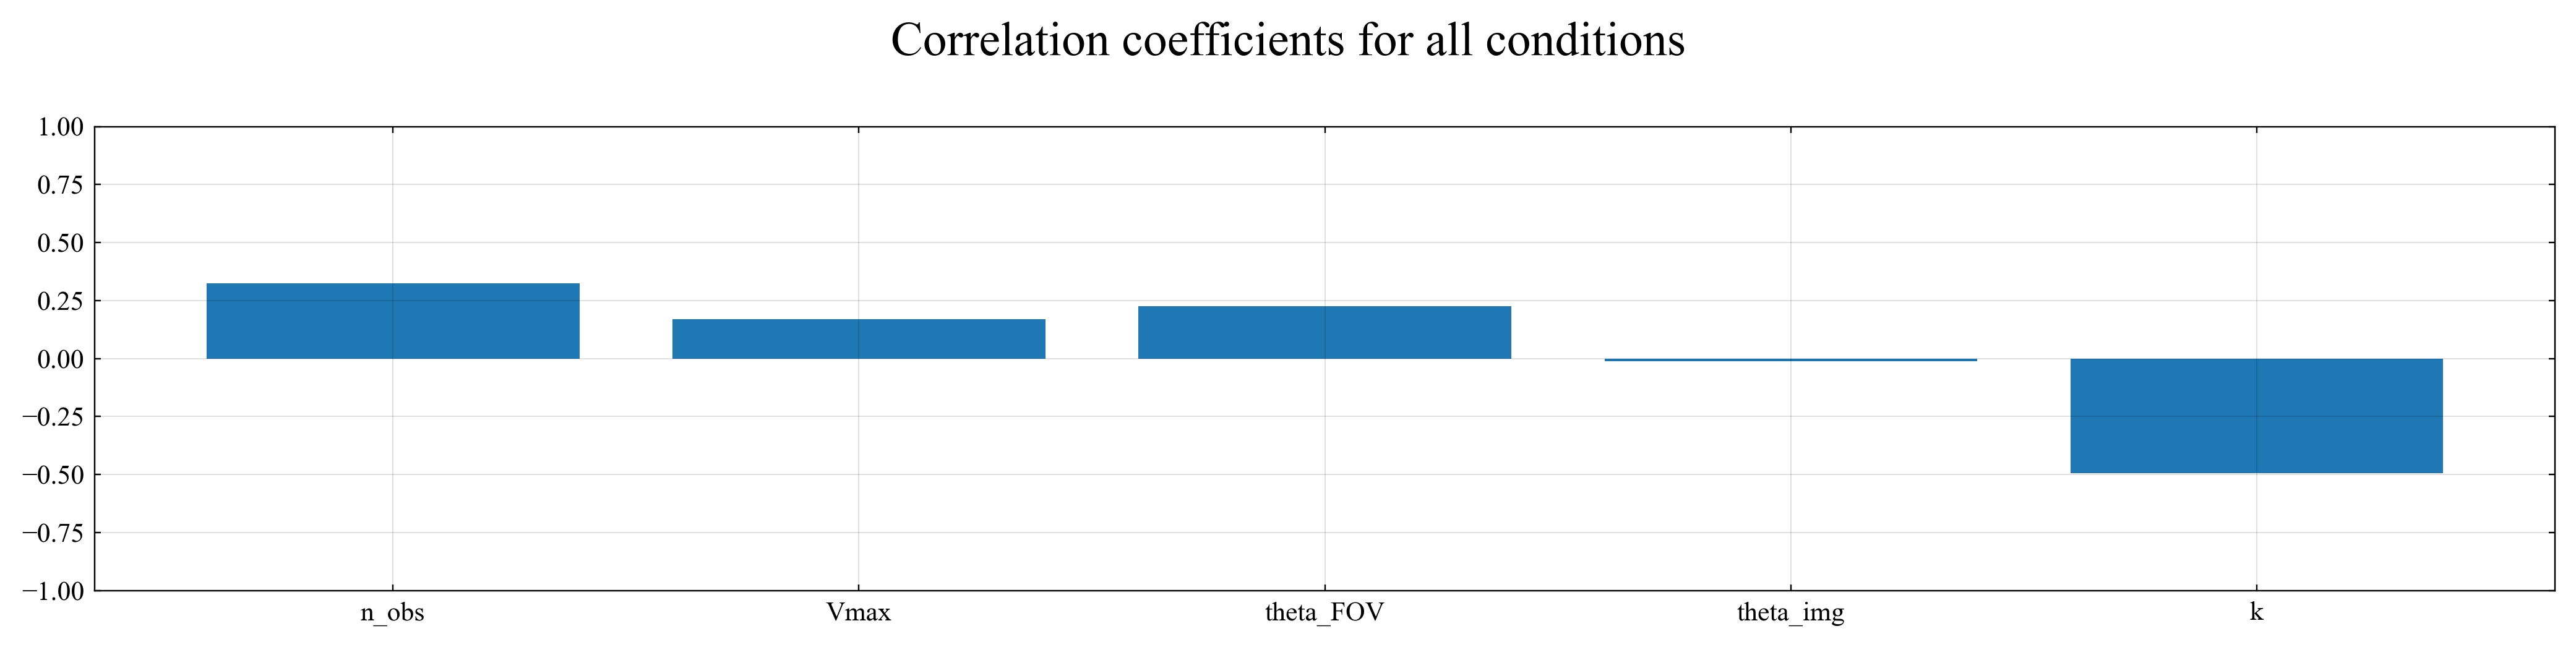

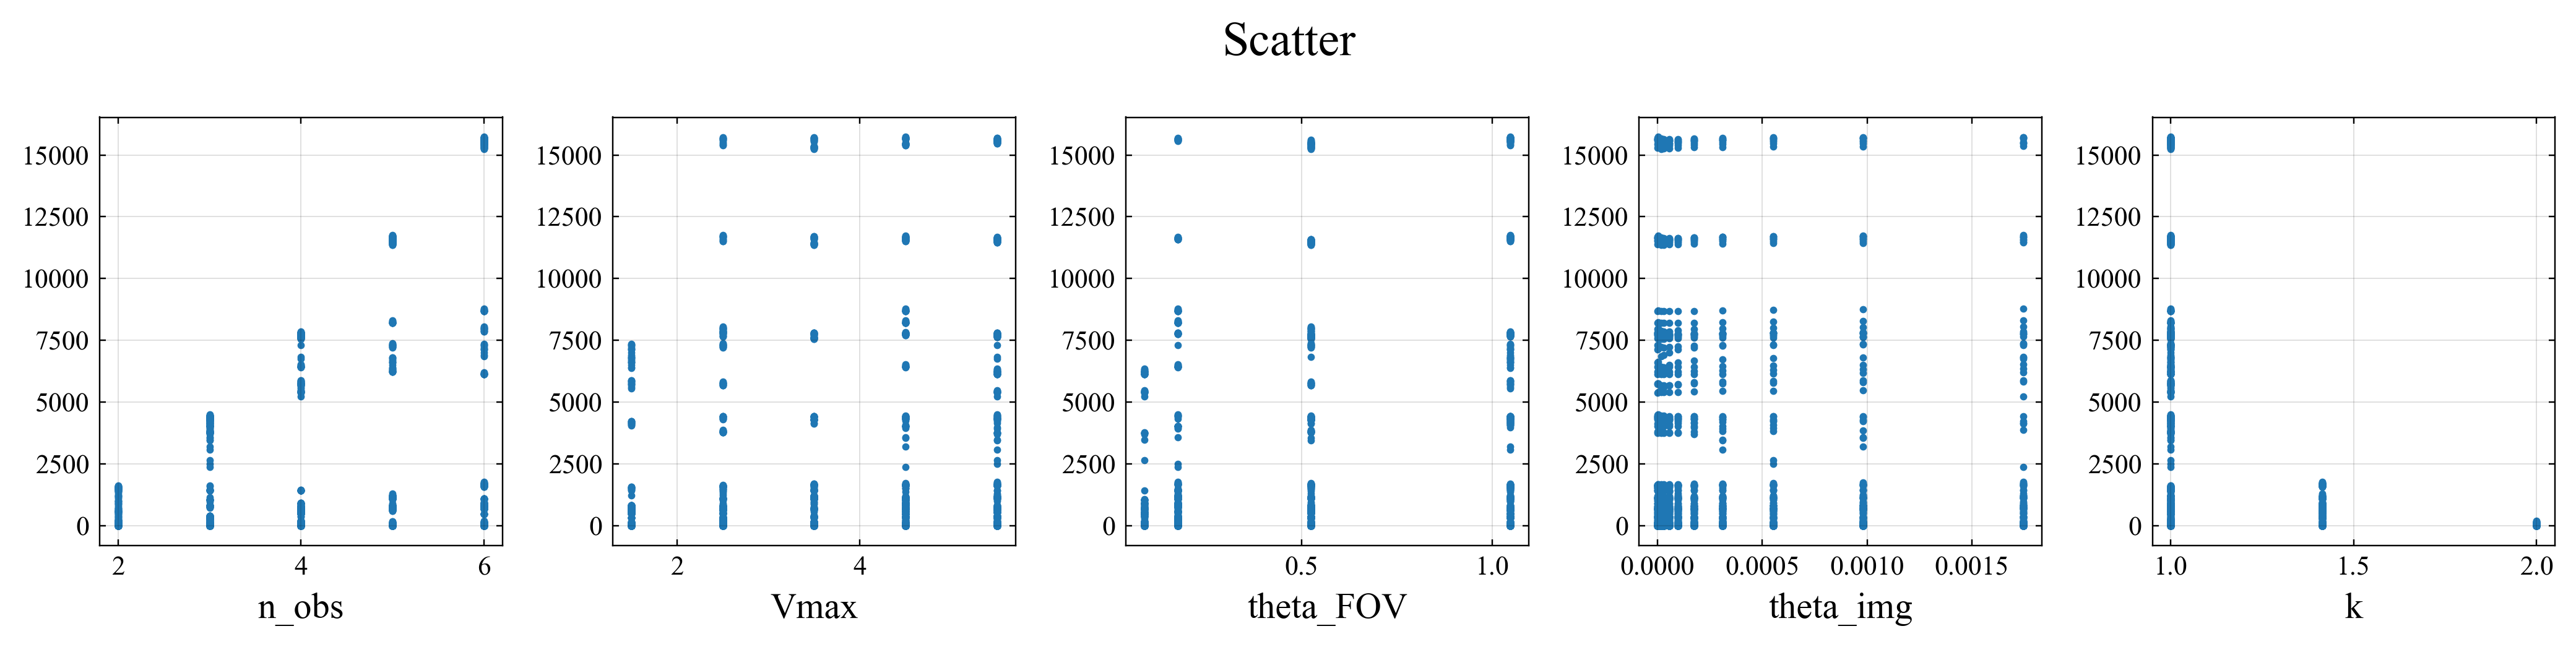

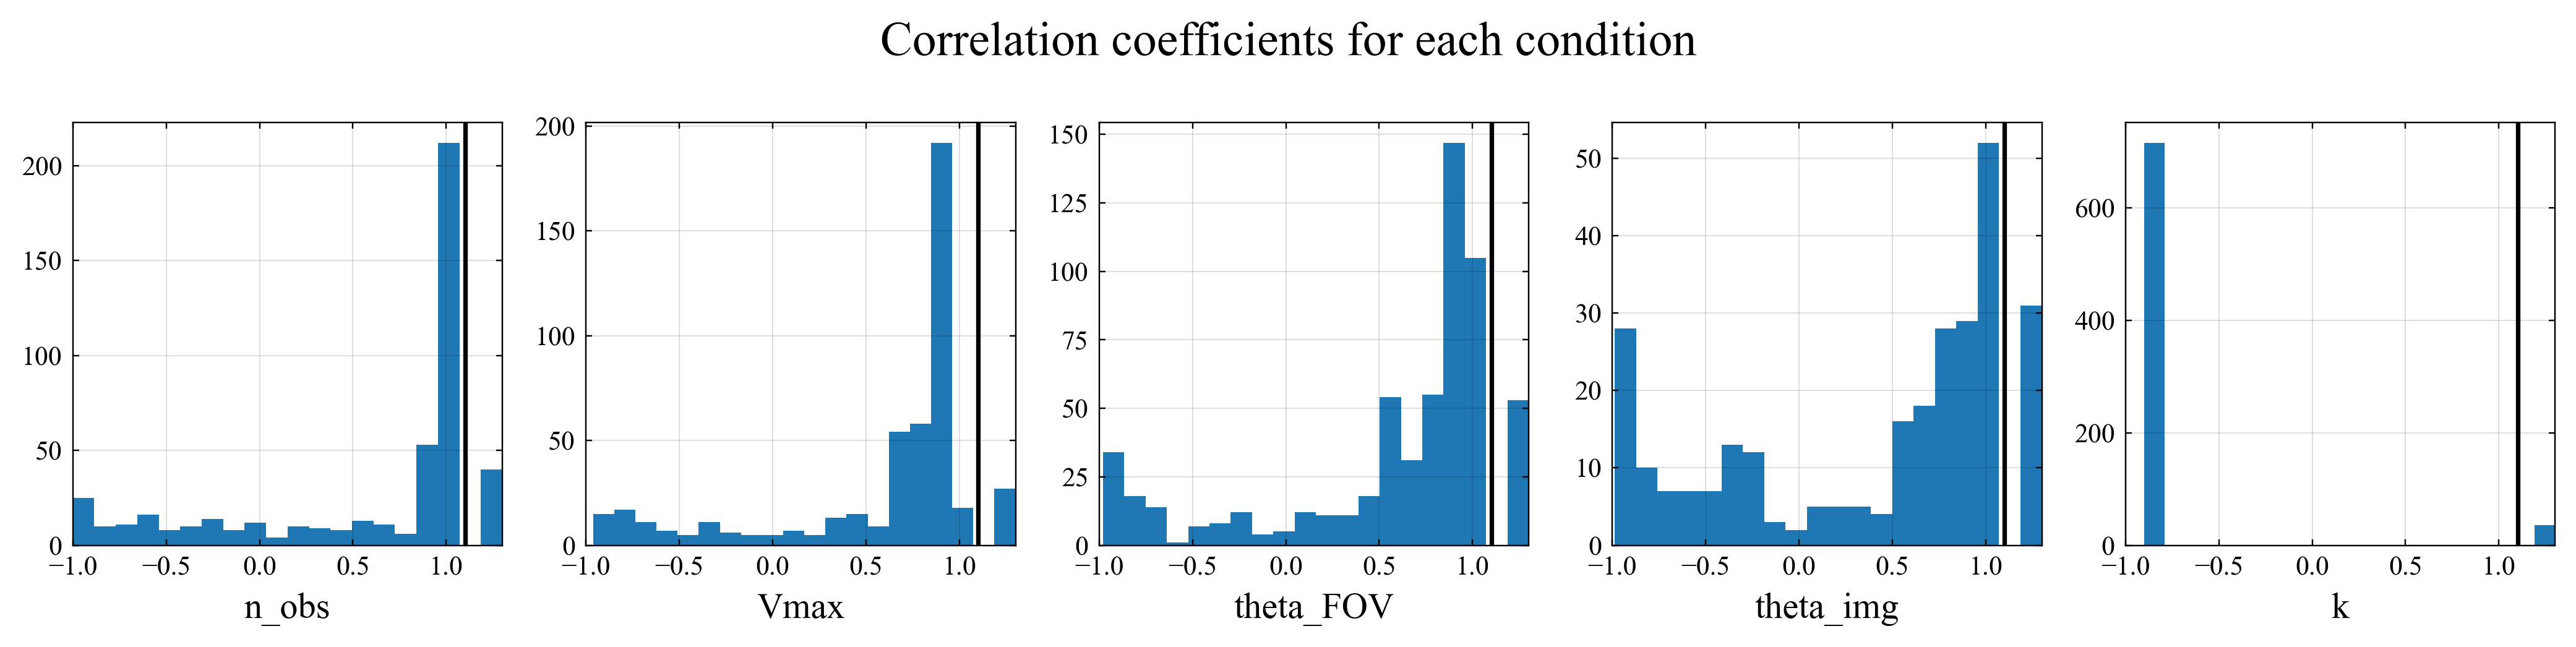

In [16]:
figsize = (12, 3)
target_col = 'notincluded_noexist_num'
param_col = ['n_obs', 'Vmax', 'theta_FOV', 'theta_img', 'k']
param_list = [n_obs_list, Vmax_list, theta_FOV_list, theta_img_list, k_list]

plot(df, target_col, param_col, param_list, figsize=figsize)

- n_obsを増加させることにより間違いを回避できている。（）
- Vmaxが増加すると間違い回避が増えている。（？）